# 결정 트리

## 로지스틱 회귀로 와인 분류하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

와인 데이터를 먼저 불러오자. 앞에서 열 3개는 각각 알코올 도수,당도,PH 값을 나타낸다. 네번째 열은 타깃값으로 0이면 레드와인 1이면 화이트 와인이다. 

In [3]:
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


레드 와인과 화이트 와인을 구분하는 이진 분류 문제이고, 화이트 와인이 양성 클래스이다. 즉 전체 와인에서 화이트 와인을 골라내는 문제이다. 

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.isna().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [8]:
wine['class'].unique()

array([0., 1.])

출력 결과를 보면 총 6497개의 샘플이 있고 누락된 값은 없는 것 같다.

In [9]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'sugar'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

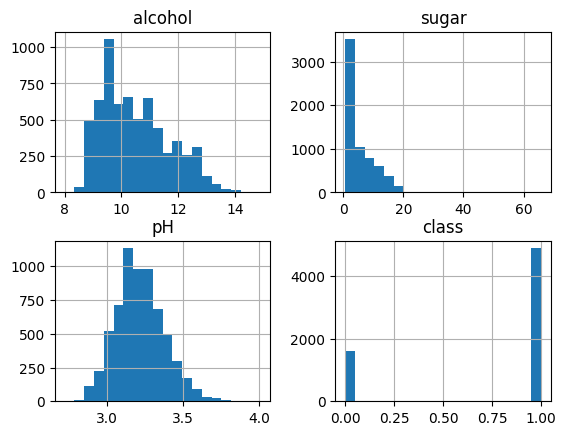

In [10]:
wine.hist(bins=20)

평균, 표준편차, 최소, 최대값과 중간값, 1사분위수, 3사분위수를 알려준다. 여기서 알 수 있는 것은 알코올 도수와 당도, PH 값의 스케일이 다르다는 것이다. 이전에 배웠던 사이킷런의 StandardScaler 클래스를 사용해 특성을 표준화하자. 


## 학습/검증 세트

데이터프레임을 넘파이 배열로 바꾸고 훈련 세트와 테스트 세트로 나누자.

In [ ]:
data = wine.drop(['class'], axis=1).values
target = wine['class'].values

In [12]:
data.shape, target.shape

((6497, 3), (6497,))

train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트 세트로 지정한다. 샘플개수가 충분히 많으므로 20% 정도만 테스트 세트로 나누었다. 코드의 test_size=0.2가 이런 의미이다.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=50)

In [15]:
X_train.shape, X_test.shape

((5197, 3), (1300, 3))

알코올 도수와 당도, PH 값의 스케일이 다른 범위 값을 StandardScaler 클래스를 사용해 특성을 표준화하자. 

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [17]:
ss.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [18]:
X_train_scaled = ss.transform(X_train)

In [19]:
X_test_scaled = ss.transform(X_test)

In [20]:
type(X_test_scaled)

numpy.ndarray

In [21]:
X_train_scaled.min(), X_train_scaled.max()

(np.float64(-3.1001913471615157), np.float64(12.606190751704741))

In [22]:
X_test_scaled.min(), X_test_scaled.max()

(np.float64(-2.788730274131511), np.float64(5.462398293870139))

In [23]:
X_train_scaled[:3]

array([[ 1.10159051,  1.78606065, -0.48391833],
       [ 0.34441745, -0.84586288,  0.69963374],
       [-0.83340731,  1.18030048,  1.26026368]])

In [24]:
X_train[:3]

array([[11.8 , 14.  ,  3.14],
       [10.9 ,  1.4 ,  3.33],
       [ 9.5 , 11.1 ,  3.42]])

이제 표준점수로 변환된 train_scaled와 test_scaled를 사용해 로지스틱 회귀 모델을 훈련하자.



In [26]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

In [27]:
lr_clf.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
print("Train score: ", lr_clf.score(X_train_scaled, y_train))
print("Test score: ", lr_clf.score(X_test_scaled, y_test))

Train score:  0.7796805849528574
Test score:  0.7853846153846153


점수가 높지 않다. ***훈련 세트와 테스트 세트의 점수가 모두 낮아서 모델이 과소적합*** 이라 볼 수 있다.이 문제를 해결하기 위해 규제 매개 변수 C의 값을 바꾸던지 solver 매개변수에서 다른 알고리즘을 선택할 수도 있다. 또한 다항 특성을 만들어 추가할 수도 있다.

### 설명하기 쉬운 모델과 어려운 모델

로지스틱 회귀가 학습한 계수와 절편을 출력해 보자.

In [30]:
lr_clf.coef_

array([[ 0.52119637,  1.6623573 , -0.69600674]])

In [31]:
lr_clf.intercept_

array([1.76817573])

사실 이 모델이 왜 저런 계수 값을 학습했는지 정확히 이해하기 어렵다. 

아마도 알코올 도수와 당도가 높을수록 화이트 와인일 가능성이 높고, PH가 높을수록 레드 와인일 가능성이 높은 것 같다. 하지만 정확히 이 숫자가 어떤 의미인지 설명하긴 어렵다. 더군다나 다항 특성을 추가한다면 설명하기가 더 어려울 것이다. 대부분 러닝머신 모델은 이렇게 학습의 결과를 설명하기 어렵다. 쉬운 방법으로 설명할 수 있는 모델을 알아보자.

## 결정 트리

결정 트리 모델이 이유를 설명하기가 쉽다. 결정 트리 모델은 스무고개와 같다. 데이터를 잘 나눌 수 있는 질문을 찾는다면 계속 질문을 추가해서 분류 정확도를 높일 수 있다. 사이킷런의 DecisionTreeClassifier 클래스를 사용해 결정 트리 모델을 훈련해 보자. fit() 메서드를 호출해서 모델을 훈련한 다음 score() 메서드로 정확도를 평가해 보자.

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

In [33]:
dt_clf.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
print("Train score: ", dt_clf.score(X_train_scaled, y_train))
print("Test score: ", dt_clf.score(X_test_scaled, y_test))

Train score:  0.9974985568597268
Test score:  0.8638461538461538


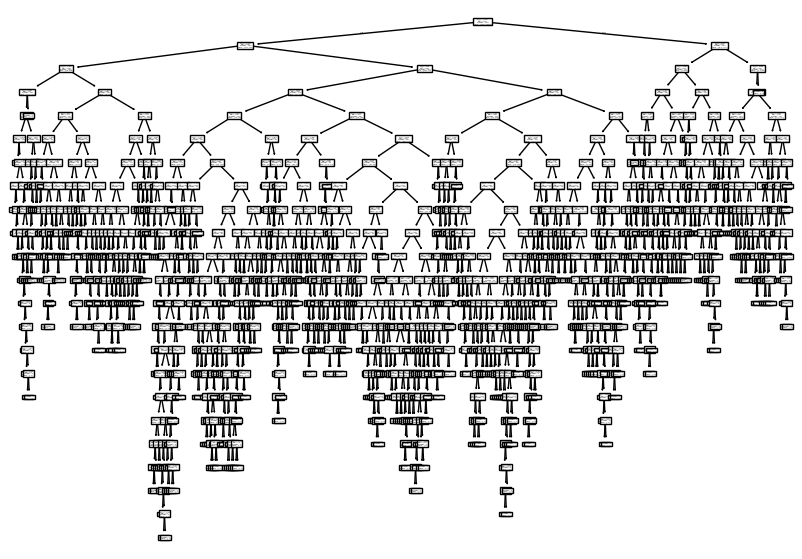

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))

plot_tree(dt_clf)

plt.show()

너무 복잡하니 plot_tree() 함수에서 트리의 깊이를 제한해서 출력해 보자. 

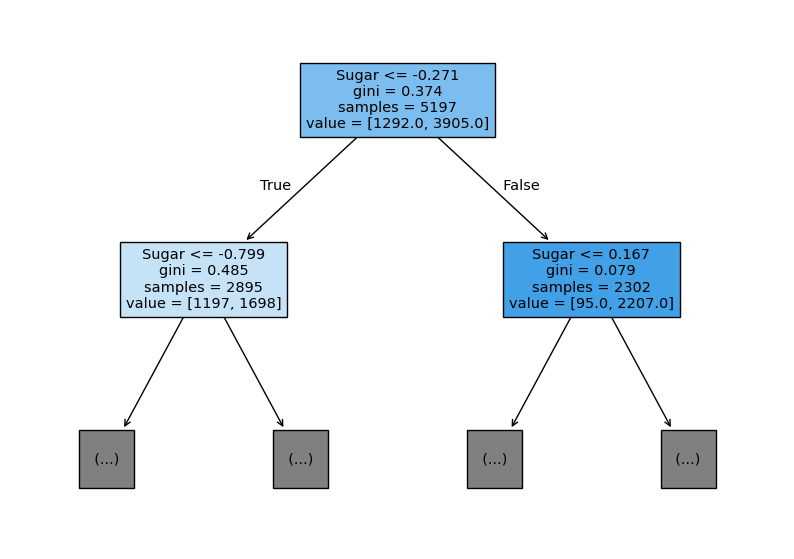

In [36]:
plt.figure(figsize=(10,7))

plot_tree(dt_clf, max_depth=1, filled=True, feature_names=['Alchole', 'Sugar', 'pH'])

plt.show()


이번엔 노드 상자 안에 있는 gini에 대해 알아보자.

### - 불순도

gini는 지니 불순도(gini impurity)를 의미한다. DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 gini이다. creterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다. 앞의 루트 노드에서 -0.239를 기준으로 왼쪽과 오른쪽 노드로 나누었다. 나눈 방법은 바로 criterion 매개변수에 지정한 지니 불순도를 사용한 것이다. 지니 불순도는 클래스의 비율을 제곱해서 더한 다음 1에서 빼면된다.

지니 불순도 = 1 - (음성 클래스 비율의 제곱 + 양성 클래스 비율의 제곱)


### - 엔트로피

엔트로피(Entropy)는 불순도(Impurity)를 수치적으로 나타낸 척도입니다. 엔트로피가 높다는 것은 불순도가 높다는 뜻이고, 엔트로피가 낮다는 것은 불순도가 낮다는 뜻입니다. 엔트로피가 1이면 불순도가 최대입니다

불순도/엔트로피 참고: https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree

## - 가지치기

예를 들어 열매를 잘 맺기 위해 과수원에서 가지치기를 하는 것처럼 결정 트리도 가지치기를 해야 한다. 그렇지 않으면 무작정 끝까지 자라나는 트리가 만들어진다. 훈련 세트에는 아주 잘 맞겠지만 테스트 세트에서 점수는 그에 못 미칠 것이다. 이것을 일반화가 잘 되지 않았다고 한다.

이제 가지치기를 해보자. 결정 트리에서 가지치기를 하는 가장 간단한 방법은 자라날 수 있는 트리의 최대 깊이를 지정하는 것이다. DecisionTreeClassifier 클래스의 max_depth 매개변수를 3으로 지정하여 모델을 만들어 보자.

In [43]:
dt_clf2 = DecisionTreeClassifier(max_depth=3, random_state=50)
dt_clf2.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,50
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
print("Train score: ", dt_clf2.score(X_train_scaled, y_train))
print("Test score: ", dt_clf2.score(X_test_scaled, y_test))

Train score:  0.8701173754088898
Test score:  0.8646153846153846


훈련 세트의 성능은 낮아졌지만 테스트 세트의 성능은 거의 그대로이다. plot_tree() 함수로 그려보자.

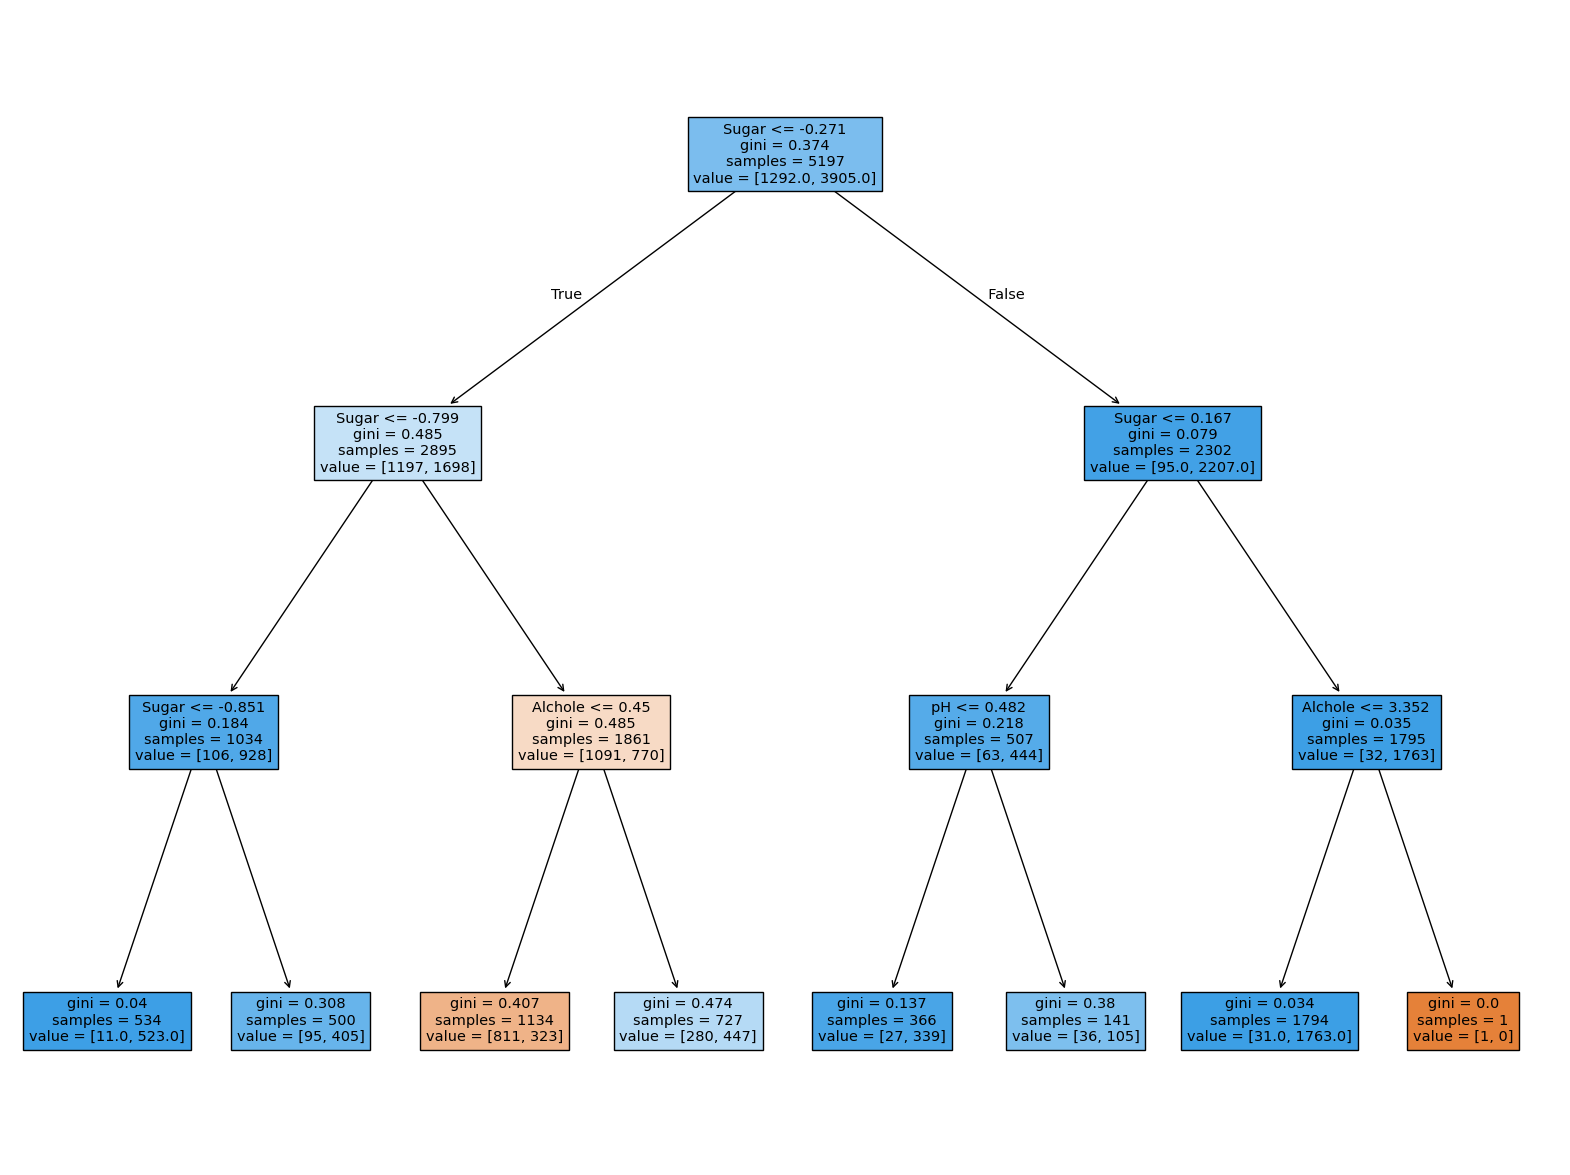

In [44]:
plt.figure(figsize=(20,15))

plot_tree(dt_clf2, filled=True, feature_names=['Alchole', 'Sugar', 'pH'])

plt.show()

## - 전처리 필요 없는 결정트리

앞서 불순도를 기준으로 샘플을 나눈다고 했다. 불순도는 클래스별 비율을 가지고 계산하였다. 샘플을 어떤 클래스 비율로 나누는지 계산할 때 특성값의 스케일이 계산에 영향을 미칠까? 아니다. 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않는다. 따라서 표준화 전처리를 할 필요가 없다. 이것이 결정 트리 알고리즘의 또 다른 장점 중 하나이다.

그럼 앞서 전처리하기 전의 훈련 세트와 테스트 세트로 결정 트리모델을 다시 훈련해 보자.

In [47]:
dt_clf3 = DecisionTreeClassifier(random_state=50)
dt_clf3.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,50
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
print("Train score: ", dt_clf3.score(X_train, y_train))
print("Test score: ", dt_clf3.score(X_test, y_test))

Train score:  0.9974985568597268
Test score:  0.8630769230769231


```
Train score:  0.9974985568597268
Test score:  0.8638461538461538
```

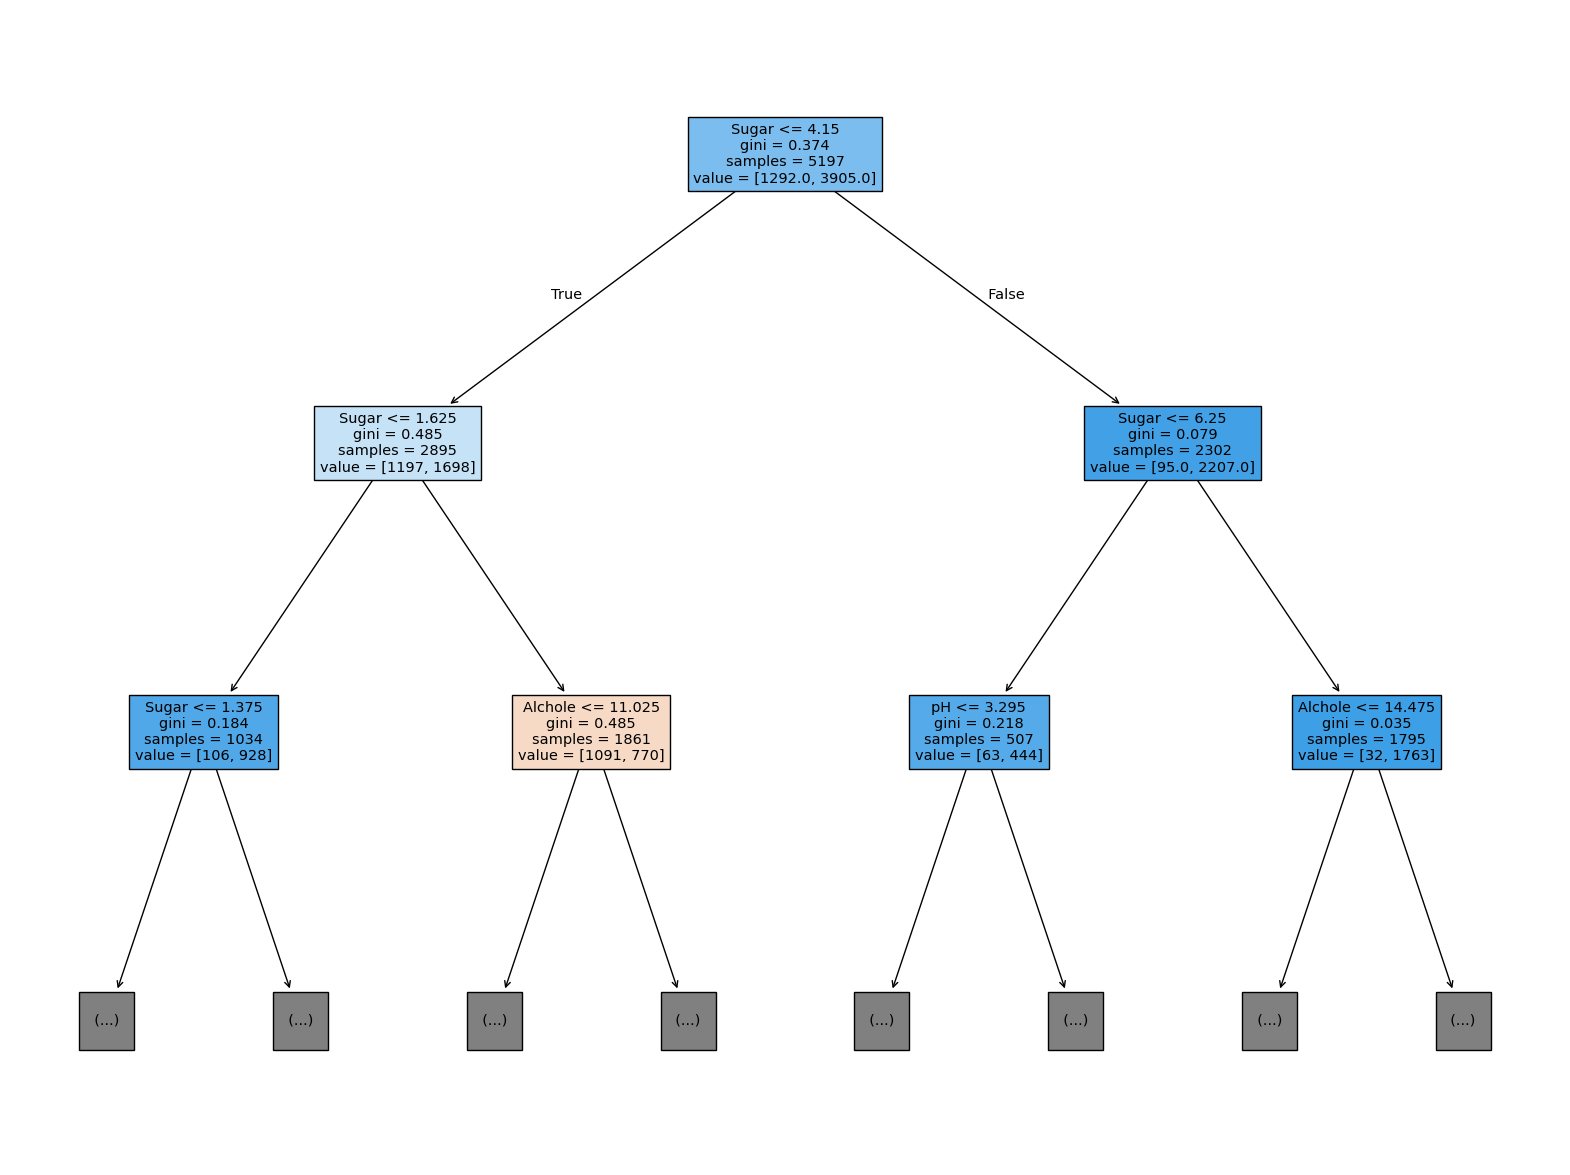

In [51]:
plt.figure(figsize=(20,15))

plot_tree(dt_clf3, max_depth=2, filled=True, feature_names=['Alchole', 'Sugar', 'pH'])

plt.show()

결과를 보면 같은 트리지만, 특성값을 표준점수로 바꾸지 않은 터라 이해하기가 훨씬 쉽다. 당도가 1.625보다 크고 4.325보다 작은 와인중 알코올 도수가 11.025와 같거나 작은 것이 레드 와인이다. 그 이외에는 모두 화이트 와인으로 예측했다.


#### 특성 중요도

마지막으로 결정 트리는 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해 준다. 이 트리의 루트 노드와 깊이 1에서 sugar를 사용했기 때문에 아마도 sugar가 가장 유용한 특성중 하나일 것 같다. 특성 중요도는 결정 트리 모델의 featureimportances 속성에 저장되어 있다. 이 값을 출력해 보자.

In [52]:
# ['Alchole', 'Sugar', 'pH'])

dt_clf3.feature_importances_

array([0.24490859, 0.50203922, 0.2530522 ])

역시 두 번째 특성인 sugar가 0.87 정도로 특성 중요도가 가장 높다. 특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산한다. 특성 중요도를 활용하면 결정 트리 모델을 특성 선택에 활용할 수 있다. 이것이 결정 트리 알고리즘의 또 다른 장점중 하나이다.

parameter --> hyper parameter

```
class DecisionTreeClassifier(
    *,
    criterion: Literal['gini', 'entropy', 'log_loss'] = "gini",
    splitter: Literal['best', 'random'] = "best",
    max_depth: Int | None = None,
    min_samples_split: float = 2,
    min_samples_leaf: float = 1,
    min_weight_fraction_leaf: Float = 0,
    max_features: float | Literal['auto', 'sqrt', 'log2'] | None = None,
    random_state: Int | RandomState | None = None,
    max_leaf_nodes: Int | None = None,
    min_impurity_decrease: Float = 0,
    class_weight: Mapping | str | Sequence[Mapping] | None = None,
```

In [ ]:
DecisionTreeClassifier()

## 예)

불순물 기준을 변경해 보자

In [61]:
dt_clf4 = DecisionTreeClassifier( min_impurity_decrease=0.000001, random_state=50)
dt_clf4.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,50
,max_leaf_nodes,None
,min_impurity_decrease,1e-06
,class_weight,None


In [62]:
print("Train score: ", dt_clf4.score(X_train, y_train))
print("Test score: ", dt_clf4.score(X_test, y_test))

Train score:  0.9974985568597268
Test score:  0.8630769230769231


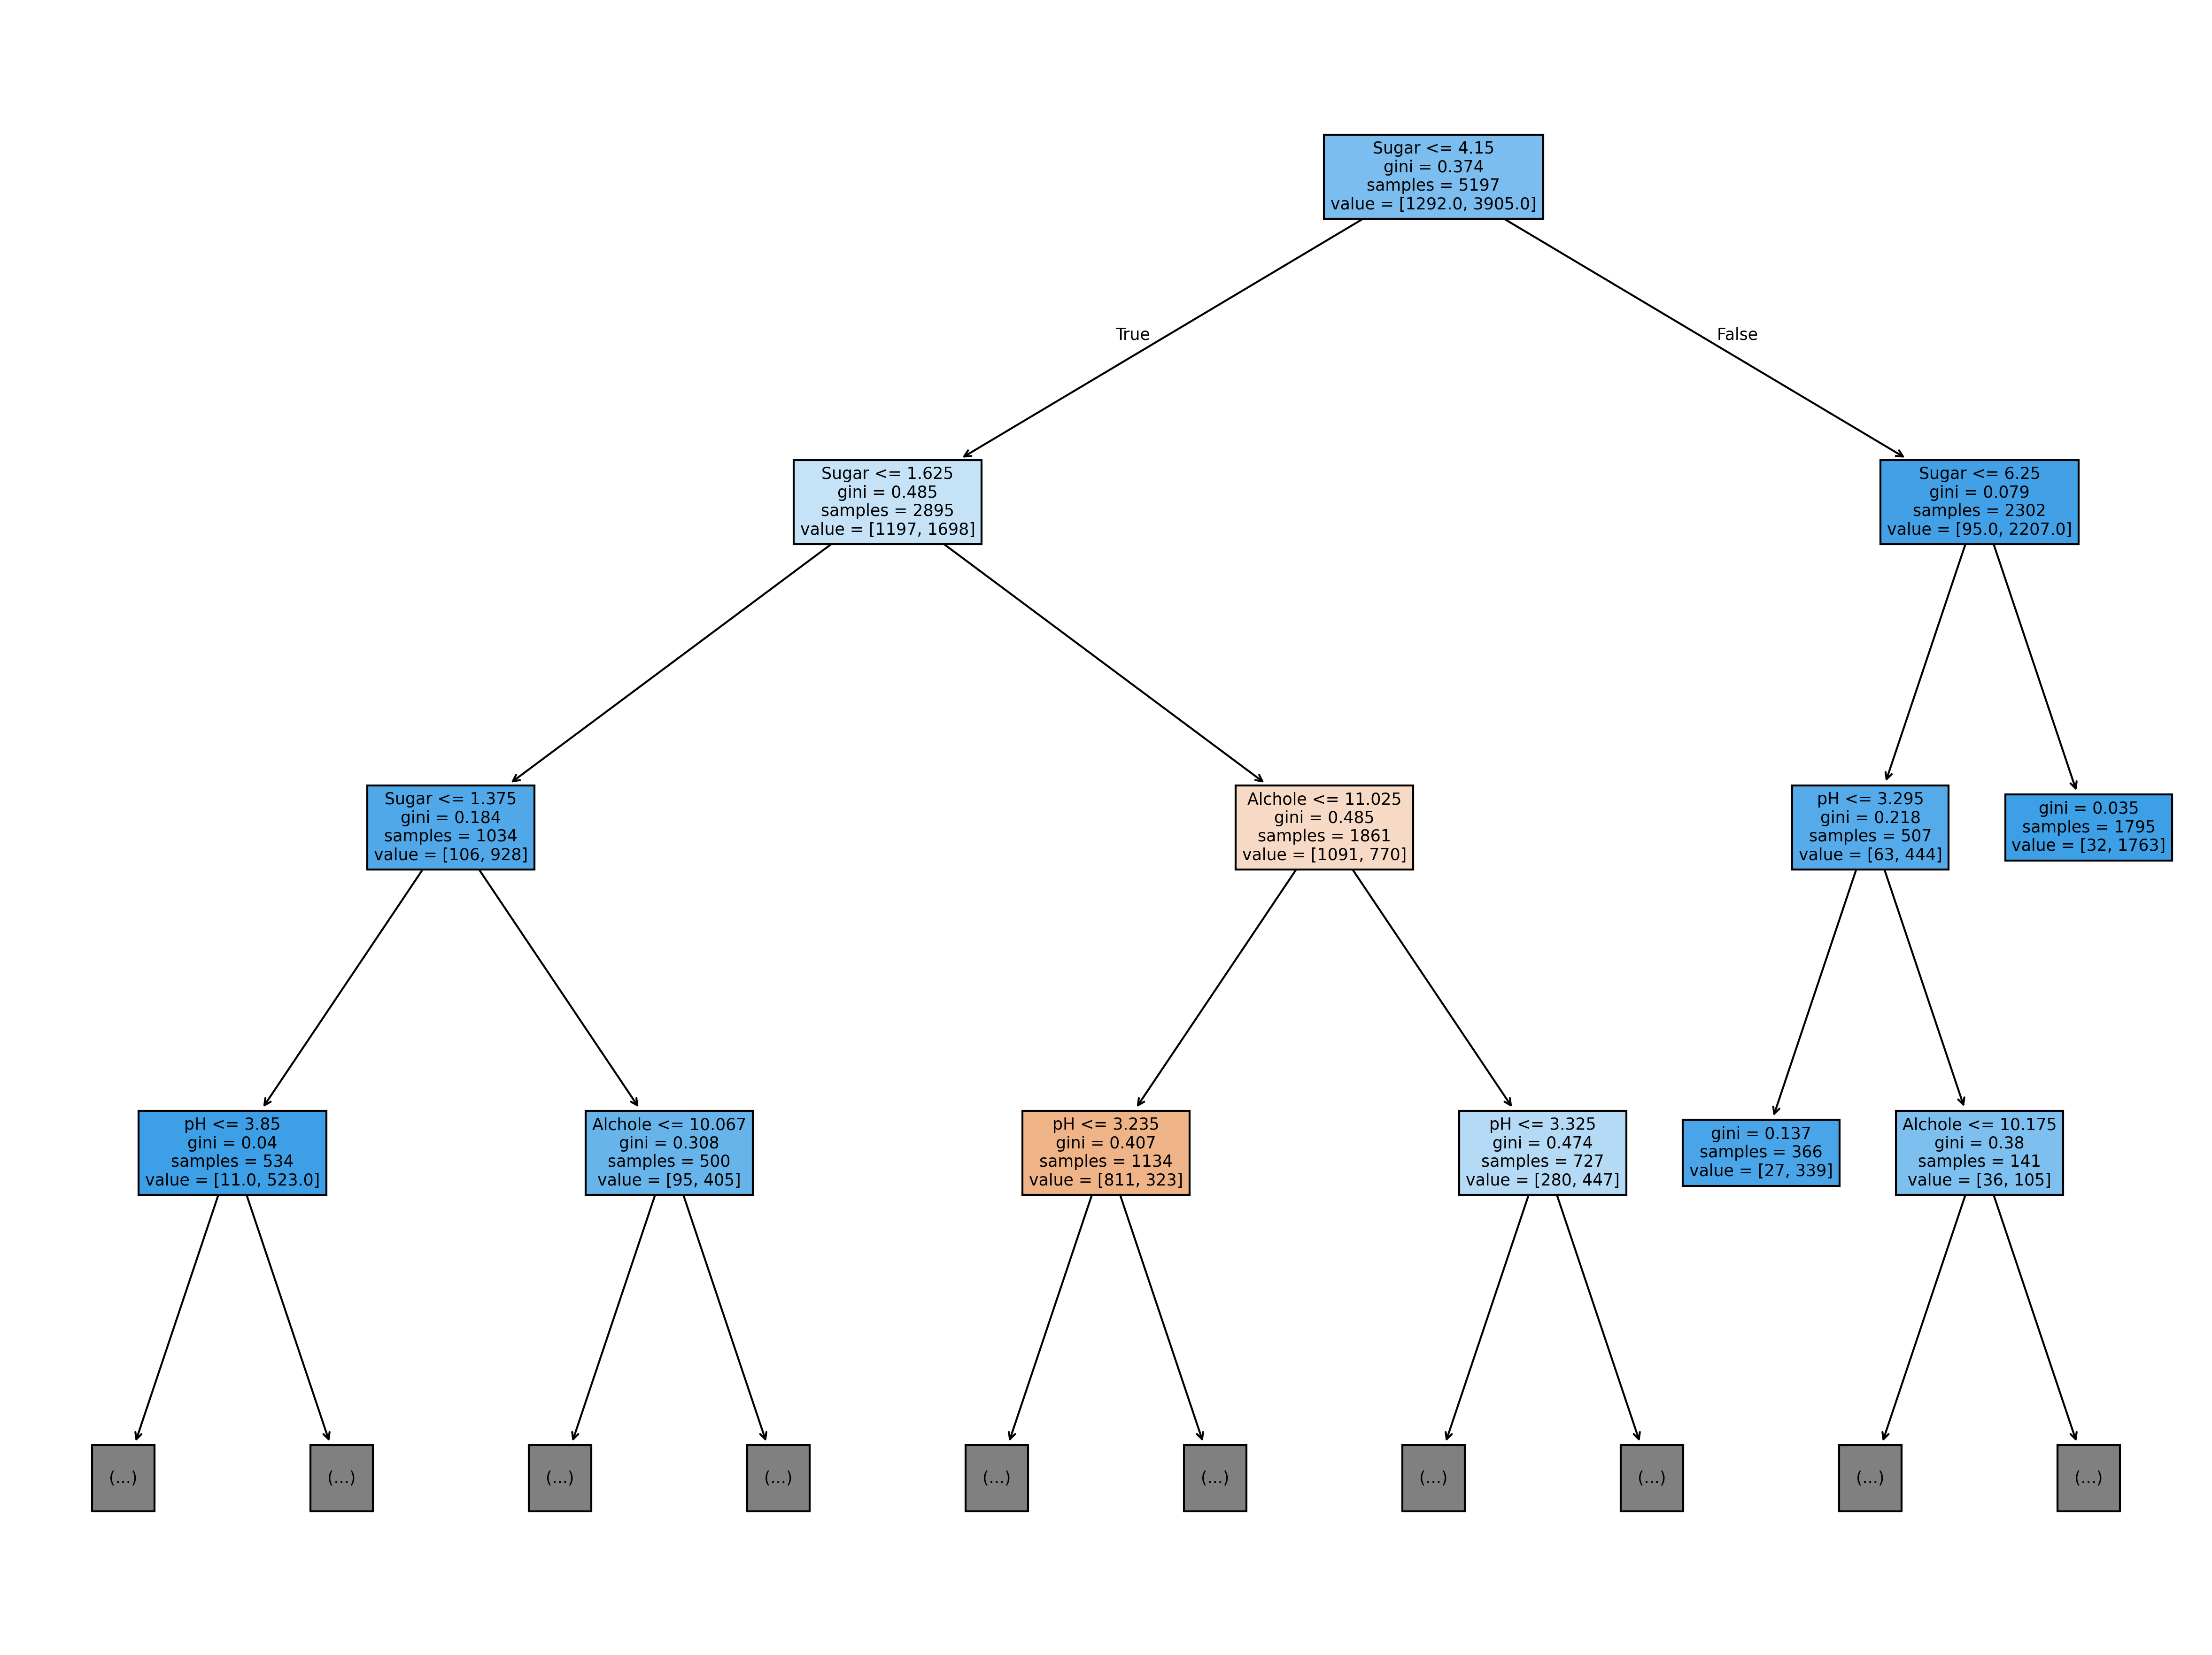

In [57]:
plt.figure(figsize=(20,15), dpi=300)

plot_tree(dt_clf4, max_depth=3, filled=True, feature_names=['Alchole', 'Sugar', 'pH'])

plt.show()

---

참고
 - 혼자 공부하는 머신러닝+딥러닝